In [7]:
import numpy as np
import pandas as pd
from scipy import sparse, stats
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec


#from matplotlib import rc
#rc('text', usetex = True)


In [8]:
def load_detected_cartels(years, cartel_dir):
    cartel_table_list = []
    group_id_offset = 0
    for year in years:
        cartel_table = pd.read_csv(
            "{root}/cartels-{year}.csv".format(root=cartel_dir, year=year), sep="\t"
        )
        cartel_table["year"] = year
        cartel_table["group_id"] += group_id_offset
        group_id_offset = np.max(cartel_table["group_id"].values) + 1
        cartel_table_list += [cartel_table]
    cartel_table = pd.concat(cartel_table_list, ignore_index=True)
    return cartel_table

In [9]:
data_dir = "~/Google Drive/projects/journal-citation-cartels/data"
cartel_table = load_detected_cartels(
    np.arange(2000, 2020), "{data_dir}/cartels".format(data_dir=data_dir)
)

In [10]:
# Count the number of detected groups in each year
num_cartel = (
    cartel_table.groupby("year")
    .apply(lambda x: x[["group_id"]].drop_duplicates().shape[0])
    .reset_index()
    .rename(columns={0: "num_cartel"})
)

# Compute the size
cartel_sz = (
    cartel_table.groupby(["year", "group_id"])
    .apply(lambda x: x.shape[0])
    .reset_index()
    .rename(columns={0: "sz"})
)

# Compute the maximum size for each year
maxsz = (
    cartel_sz.groupby("year")
    .apply(lambda dg: dg["sz"].max())
    .reset_index()
    .rename(columns={0: "sz"})
)
maxsz["year"] = maxsz["year"] - 2000


<ipython-input-11-28be5b283897>:47: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[0].annotate('(a)', xy=(0.01, 0.9), textcoords = "axes fraction", fontsize = 30)


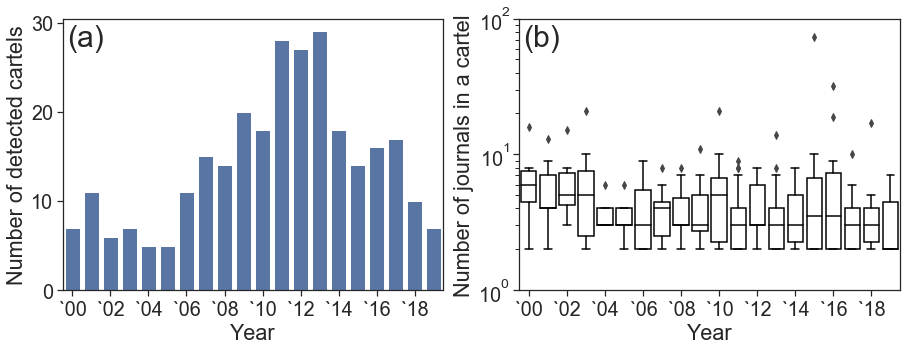

In [11]:


sns.set_style("white")
sns.set(font_scale=1.8)
sns.set_style("ticks")

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

#
# Plot the number of cartels in each year
#
ax = sns.barplot(
    data=num_cartel,
    x="year",
    y="num_cartel",
    color=sns.color_palette().as_hex()[0],
    ax = axes[0]
)
# Labels
ax.set_ylabel("Number of detected cartels")
ax.set_xlabel("Year")

# Ticks
ax.set_xticks(np.arange(0, 20, 2))
ax.set_xticklabels(["`%02d" % d for d in np.arange(2000, 2020, 2) - 2000])

#
# Plot the size of cartels detected in each year
#
ax = sns.boxplot(data=cartel_sz, x="year", y="sz",)

# Remove colors of the boxes
for i, box in enumerate(ax.artists):
    box.set_edgecolor("black")
    box.set_facecolor("white")
    for j in range(6 * i, 6 * (i + 1)):
        ax.lines[j].set_color("black")

        ax.set_yscale("log")
ax.set_ylim(bottom=1, top=100)

ax.set_ylabel("Number of journals in a cartel")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(0, 20, 2))
ax.set_xticklabels(["`%02d" % d for d in np.arange(2000, 2020, 2) - 2000])


# Annotate
axes[0].annotate('(a)', xy=(0.01, 0.9), textcoords = "axes fraction", fontsize = 30)
axes[1].text(0.01, 0.9, '(b)', transform = axes[1].transAxes, fontsize = 30)

plt.savefig("../../figs/detected-cartel-stat.pdf", bbox_inches="tight", dpi=300)